In [1]:
import json 
import os
import subprocess
import numpy as np

In [32]:
# forward

#slow 0.173
#medium 0.259
#fast 0.437
#dtheta 

# side

#slow 0.1382
#medium 0.2154
#fast 0.3631

# yaw

#slow 0.104
#medium 0.22
#fast 0.63

slow = (0.173**2 + 0.1382**2)**0.5
medium = (0.259**2 + 0.2154**2)**0.5
fast = (0.437**2 + 0.3631**2)**0.5

print("slow", slow)
print("medium", medium)
print("fast", fast)


slow 0.2214232146817492
medium 0.3368651955901648
fast 0.5681642456191696


In [34]:
dx_range = [-0.8, 0.8]
dy_range = [-0.8, 0.8]
dtheta_range = [-1.0, 1.0]

presets_dir = "awd/data/assets/go_bdx/placo_presets"
tmp_dir = os.path.join(presets_dir, "tmp")
os.makedirs(tmp_dir, exist_ok=True)

preset_speeds = ["slow", "medium", "fast"]

for i in range(1):
    # Randomly select a preset speed
    selected_speed = np.random.choice(preset_speeds)
    #selected_speed = "fast"
    # Load the selected preset
    with open(os.path.join(presets_dir, f"{selected_speed}.json")) as file:
        data = json.load(file)

    # data["dx"] = 0.3
    # data["dy"] = 0.0
    # data["dtheta"] = 0.0

    # Modify dx, dy, dtheta randomly
    data["dx"] = round(np.random.uniform(dx_range[0], dx_range[1]), 2)
    data["dy"] = round(np.random.uniform(dy_range[0], dy_range[1]), 2)
    data["dtheta"] = 0.0

    tmp_preset = os.path.join(tmp_dir, f"{selected_speed}.json")
    with open(tmp_preset, 'w') as file:
        json.dump(data, file, indent=4)

    subprocess.run(['python', "gait_generator.py", "--preset", f"{tmp_preset}", "--name", f"{i}"])

<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<double, std::allocator<double> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.


gait_parameters {'dx': 0.33, 'dy': -0.38, 'dtheta': 0.0, 'duration': 2, 'hardware': True, 'trunk_mode': True, 'double_support_ratio': 0.1, 'startend_double_support_ratio': 1.5, 'planned_timesteps': 48, 'replan_timesteps': 10, 'walk_com_height': 0.26, 'walk_foot_height': 0.025, 'walk_trunk_pitch': 6, 'walk_foot_rise_ratio': 0.1, 'single_support_duration': 0.2, 'single_support_timesteps': 10, 'foot_length': 0.16, 'feet_spacing': 0.19, 'zmp_margin': 0.0, 'foot_zmp_target_x': 0.0, 'foot_zmp_target_y': 0.0, 'walk_max_dtheta': 1.0, 'walk_max_dy': 0.1, 'walk_max_dx_forward': 0.1, 'walk_max_dx_backward': 0.1, 'joints': ['left_hip_yaw', 'left_hip_roll', 'left_hip_pitch', 'left_knee', 'left_ankle', 'neck_pitch', 'head_pitch', 'head_yaw', 'head_roll', 'left_antenna', 'right_antenna', 'right_hip_yaw', 'right_hip_roll', 'right_hip_pitch', 'right_knee', 'right_ankle'], 'joint_angles': {'head_pitch': 0, 'head_yaw': 0, 'head_roll': 0, 'neck_pitch': 0, 'left_antenna': 0, 'right_antenna': 0}}


  -pelvis_0 collides with left_hip_rotation_0
  -pelvis_0 collides with neck_0
  -pelvis_0 collides with right_hip_rotation_0
  -left_hip_rotation_0 collides with left_hip_0
  -left_hip_0 collides with left_thigh_0
  -left_thigh_0 collides with left_shin_0
  -left_shin_0 collides with left_foot_link_0
  -neck_0 collides with head_body_pitch_0
  -head_body_pitch_0 collides with head_body_yaw_0
  -head_body_yaw_0 collides with head_body_roll_0
  -head_body_roll_0 collides with ear_left_0
  -head_body_roll_0 collides with ear_right_0
  -right_hip_rotation_0 collides with right_hip_0
  -right_hip_0 collides with right_thigh_0
  -right_thigh_0 collides with right_shin_0
  -right_shin_0 collides with right_foot_link_0


Placing the robot in the initial position...
Initial position reached
{'left_hip_yaw': -0.04698557882467102, 'left_hip_roll': -0.07705313755643177, 'left_hip_pitch': -0.011694935942324914, 'left_knee': 0.08853622760664177, 'left_ankle': -0.0034283280761262754, 'neck_pitch': 0.0, 'head_pitch': 0.0, 'head_yaw': 0.0, 'head_roll': 0.0, 'left_antenna': 0.0, 'right_antenna': 0.0, 'right_hip_yaw': -0.05347064322233007, 'right_hip_roll': -0.014681260217830923, 'right_hip_pitch': -0.01391126311578808, 'right_knee': -0.16717212273305665, 'right_ankle': -0.049898861138749744}
## period: 0.44
args.preset: awd/data/assets/go_bdx/placo_presets/tmp/fast.json 100100100100100100100100100100
center_y_pos: -0.095
recorded 300 frames
avg lin_vel_x 0.3112
avg lin_vel_y -0.3072
avg yaw 0.0
DONE, saving 0.json


In [31]:
import os
import json

# Directory containing the JSON files
data_dir = "recordings"

# Lists to store the data
speeds = []
preset_names = []

# Iterate through all JSON files in the directory
for filename in os.listdir(data_dir):
    if filename.endswith(".json"):
        file_path = os.path.join(data_dir, filename)
        with open(file_path, 'r') as file:
            data = json.load(file)
            
        # Extract the relevant information
        placo_data = data.get("Placo", {})
        avg_x_vel = placo_data.get("avg_x_lin_vel", 0)
        avg_y_vel = placo_data.get("avg_y_lin_vel", 0)
        preset_name = placo_data.get("preset_name", "unknown")
        
        # Calculate the total speed
        total_speed = np.sqrt(avg_x_vel**2 + avg_y_vel**2)

        print(total_speed, preset_name)
        

    if (preset_name == 'slow' and total_speed > slow) or \
       (preset_name == 'medium' and (total_speed <= slow or total_speed > fast)) or \
       (preset_name == 'fast' and total_speed <= medium):
    
        # delete the file
        os.remove(file_path)

        print(f"Deleted {file_path}")


0.16380076312398548 preset
0.2355780974539017 preset
0.17671513800464295 preset
0.23566111261724962 preset
0.2861207612180563 preset
0.4243708873143868 preset
0.1963809053854269 preset
0.285526548678052 preset
0.465507228730124 preset
0.27186239166166404 preset
0.4246527169346736 preset
0.1613054865774875 preset
0.17866062800740404 preset
0.46775699887869127 preset
0.17861088992555857 preset
0.19649860050392215 preset
0.2355559593812052 preset
0.1969594120624856 preset
0.18559660557240804 preset
0.4677573943830284 preset
0.1786944878836502 preset
0.19632427256964433 preset
0.4374443621764944 preset
0.18742307755449972 preset
0.28518022371826557 preset
0.24748197914191652 preset
0.19647842120701195 preset
0.28512400810875255 preset
0.16857437527690855 preset
0.4157863032857143 preset
0.19751832826348042 preset
0.19697319614607467 preset
0.24786738389711543 preset
0.2850548192892027 preset
0.16390497246880584 preset
0.4655392572060921 preset
0.24792256855720093 preset
0.16375313737452485

In [7]:
gait_speeds = {"slow": 0.05,
                "medium": 0.1,
                "fast": 0.2}

presets_dir = "awd/data/assets/go_bdx/placo_presets"
gait_motions = ["standing", "forward", "backward", "left", "right", "ang_left", "ang_right", "dia_forward", "dia_backward"]

In [ ]:
tmp_dir = os.path.join(presets_dir, "tmp")
os.makedirs(tmp_dir, exist_ok=True)

for gait_speed in gait_speeds:
    gait_speed_val = gait_speeds[gait_speed]
    
    for gait_motion in gait_motions:
        with open(os.path.join(presets_dir, f"{gait_speed}.json")) as file:
            data = json.load(file)
                
        if gait_speed == "slow" and gait_motion == "standing":
            pass
        elif gait_motion == "forward":
            data["dx"] = gait_speed_val
        elif gait_motion == "backward":
            data["dx"] = -gait_speed_val
        elif gait_motion == "left":
            data["dy"] = gait_speed_val
        elif gait_motion == "right":
            data["dy"] = -gait_speed_val
        elif gait_motion == "dia_forward":
            data["dx"] = gait_speed_val/2
            data["dy"] = gait_speed_val/2
        elif gait_motion == "dia_backward":
            data["dx"] = -gait_speed_val/2
            data["dy"] = -gait_speed_val/2
        elif gait_motion == "ang_left":
            data["dtheta"] = gait_speed_val
        elif gait_motion == "ang_right":
            data["dtheta"] = -gait_speed_val

        tmp_preset = os.path.join(tmp_dir, "preset.json")
        with open(tmp_preset, 'w') as file:
            json.dump(data, file, indent=4)

        subprocess.run(['python', "gait_generator.py", "--preset", f"{tmp_preset}", "--name", f"{gait_motion}_{gait_speed}"])

In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [32]:
anim = np.load("anim.npy")
sim = np.load("sim.npy")

In [33]:
anim.shape

(261, 1, 2, 3)

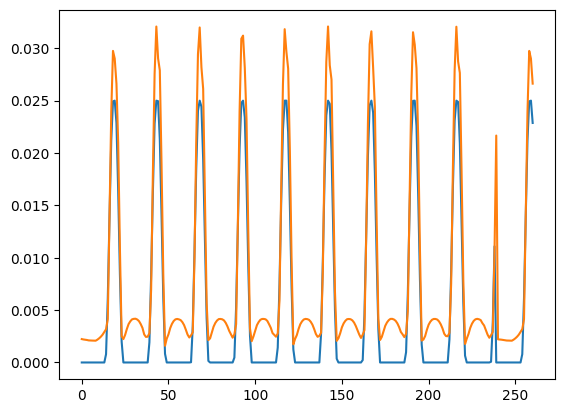

In [34]:
plt.plot(anim[:, 0, 0, 2])
plt.plot(sim[:, 0, 0, 2])